In [1]:
import requests
from bs4 import BeautifulSoup as soup
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

## Regressão Linear

In [2]:
covid = pd.read_csv('covid-muriae-auto.csv', sep=';')

In [3]:
covid

,Data,Dose 1,Dose 2,Casos Totais,Casos Ativos,Óbitos,Casos Diários,Óbitos Diários
0,2020-05-19,0,0,67,39,3,0,0
1,2020-05-20,0,0,77,49,3,10,0
2,2020-05-21,0,0,83,45,4,6,1
3,2020-05-22,0,0,95,57,4,12,0
4,2020-05-23,0,0,95,57,4,0,0
...,...,...,...,...,...,...,...,...
524,2021-10-25,84191,58139,11867,8,316,3,0
525,2021-10-26,84208,58324,11869,10,316,2,0
526,2021-10-27,84226,59297,11870,10,316,1,0
527,2021-10-28,84248,59439,11871,10,316,1,0


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
vacinacao = covid[covid['Dose 1'] > 0]
vacinacao.reset_index(drop=True, inplace=True)

In [6]:
X = vacinacao.drop('Casos Ativos', axis=1)
y = vacinacao[['Casos Ativos']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [14]:
reg = LinearRegression()
reg.fit(X_train[['Dose 1', 'Dose 2']], y_train)

LinearRegression()

In [15]:
y_pred = reg.predict(X_test[['Dose 1', 'Dose 2']])

In [16]:
results = pd.concat([X_test[['Data']], pd.DataFrame(y_pred)], axis=1).sort_values('Data')

In [17]:
results.columns = ['Data', 'pred']

In [12]:
plt.rcParams.update({'figure.facecolor': 'white'})

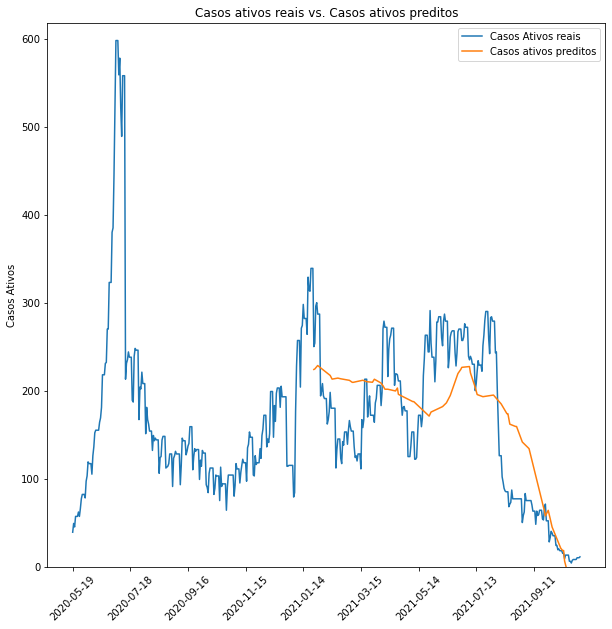

In [18]:
plt.figure(figsize=(10,10))

plt.plot(covid['Data'], covid['Casos Ativos'], label='Casos Ativos reais')
plt.plot(results['Data'], results['pred'], label='Casos ativos preditos')
plt.xticks(covid['Data'].values[::60], rotation=45)
plt.title('Casos ativos reais vs. Casos ativos preditos')
plt.ylabel('Casos Ativos')
plt.ylim(0, max(covid['Casos Ativos']+20))
plt.legend()
print('')

In [106]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

In [107]:
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

36.159893450257144
0.7350468564223764


## Transformação Log

In [21]:
from sklearn.preprocessing import FunctionTransformer

In [22]:
cols = X.select_dtypes(include='number').columns

sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

for col in cols:
    X['{}_sqrt'.format(col)] = sqrt_transformer.transform(X[col].values.reshape(-1, 1))
X

,Data,Dose 1,Dose 2,Casos Totais,Óbitos,Casos Diários,Óbitos Diários,Dose 1_sqrt,Dose 2_sqrt,Casos Totais_sqrt,Óbitos_sqrt,Casos Diários_sqrt,Óbitos Diários_sqrt
0,2021-01-20,2,0,6492,124,52,0,1.414214,0.000000,80.572948,11.135529,7.211103,0.0
1,2021-01-21,569,0,6536,124,44,0,23.853721,0.000000,80.845532,11.135529,6.633250,0.0
2,2021-01-22,765,0,6603,125,67,1,27.658633,0.000000,81.258846,11.180340,8.185353,1.0
3,2021-01-23,765,0,6603,125,0,0,27.658633,0.000000,81.258846,11.180340,0.000000,0.0
4,2021-01-24,765,0,6603,125,0,0,27.658633,0.000000,81.258846,11.180340,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2021-10-25,84191,58139,11867,316,3,0,290.156854,241.120302,108.935761,17.776389,1.732051,0.0
279,2021-10-26,84208,58324,11869,316,2,0,290.186147,241.503623,108.944940,17.776389,1.414214,0.0
280,2021-10-27,84226,59297,11870,316,1,0,290.217160,243.509753,108.949530,17.776389,1.000000,0.0
281,2021-10-28,84248,59439,11871,316,1,0,290.255060,243.801148,108.954119,17.776389,1.000000,0.0


In [23]:
X.columns

Index(['Data', 'Dose 1', 'Dose 2', 'Casos Totais', 'Óbitos', 'Casos Diários',
       'Óbitos Diários', 'Dose 1_sqrt', 'Dose 2_sqrt', 'Casos Totais_sqrt',
       'Óbitos_sqrt', 'Casos Diários_sqrt', 'Óbitos Diários_sqrt'],
      dtype='object')

In [24]:
X_log = X[['Data', 'Dose 1_sqrt', 'Dose 2_sqrt', 'Casos Totais_sqrt',
       'Óbitos_sqrt', 'Casos Diários_sqrt', 'Óbitos Diários_sqrt']]
y_log = np.log(vacinacao['Casos Ativos'])

X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size = 0.2, random_state=42)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [25]:
#forçando o último registro a aparecer nos dataframes de teste

i = X_train[X_train['Data'] == max(X_train['Data'])].index[0]

X_test = pd.concat([X_test, pd.DataFrame({'Data': X_train.loc[i, 'Data'],
                    'Dose 1_sqrt': X_train.loc[i, 'Dose 1_sqrt'], 
                    'Dose 2_sqrt': X_train.loc[i, 'Dose 2_sqrt'],
                    'Casos Totais_sqrt': X_train.loc[i,'Casos Totais_sqrt'] , 
                    'Óbitos_sqrt': X_train.loc[i, 'Óbitos_sqrt'],
                    'Casos Diários_sqrt': X_train.loc[i, 'Casos Diários_sqrt'], 
                    'Óbitos Diários_sqrt': X_train.loc[i, 'Óbitos Diários_sqrt']}, 
                                         index=[len(X_test)+1])], axis=0)
y_test = pd.concat([pd.DataFrame(y_test), 
                    pd.DataFrame({'Casos Ativos': np.log(y['Casos Ativos'][y.index == max(y.index)].values[0])}, index=[len(X_test)+1])], 
                   axis=0)

In [26]:
X_train.drop([i], inplace=True)
y_train.drop([i], inplace=True)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

C:\Users\GCPeppe\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
reg = LinearRegression()
reg.fit(X_train[['Dose 1_sqrt', 'Dose 2_sqrt', 'Casos Totais_sqrt']], y_train)

LinearRegression()

In [33]:
y_pred = reg.predict(X_test[['Dose 1_sqrt', 'Dose 2_sqrt', 'Casos Totais_sqrt']])

In [34]:
results = pd.concat([X_test[['Data']], pd.DataFrame(y_pred)], axis=1).sort_values('Data')

In [35]:
results.columns = ['Data', 'pred']

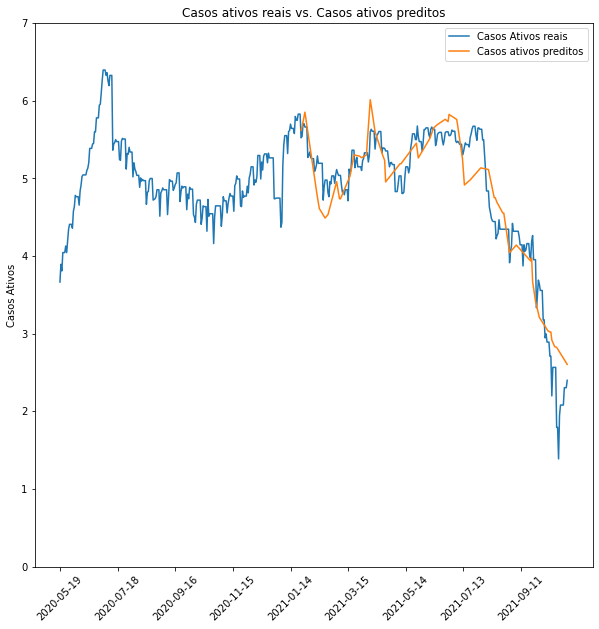

In [36]:
plt.figure(figsize=(10,10))

plt.plot(covid['Data'], np.log(covid['Casos Ativos']), label='Casos Ativos reais')
plt.plot(results['Data'], results['pred'], label='Casos ativos preditos')
plt.xticks(covid['Data'].values[::60], rotation=45)
plt.title('Casos ativos reais vs. Casos ativos preditos')
plt.ylabel('Casos Ativos')
plt.ylim(0,7)
plt.legend()
print('')

In [ ]:
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_squared_log_error(y_test, y_pred))